In [ ]:
#通过isnull和notnull侦查缺失值
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [ ]:
df1 = DataFrame([[3,5,3],[1,6,np.nan],
                ['lili',np.nan,'pop'],[np.nan,'a','b']])
df1

In [ ]:
df1.isnull() #True的是缺失值

In [ ]:
df1.notnull() #False的是缺失值

In [ ]:
df1.isnull().sum() #求每列的缺失值个数
df1.isnull().sum().sum() #求总的缺失值个数

In [ ]:
#删除缺失值--通过dropna删除缺失值行
df1.dropna()

In [ ]:
df2=DataFrame(np.arange(12).reshape(3,4))
df2

In [ ]:
df2.ix[2,:]=np.nan
df2[3]=np.nan
df2

In [ ]:
df2.dropna(how='all')

In [ ]:
#删除指定列
df2.dropna(how='all',axis=1)

##填充缺失值--fillna方法将缺失值替换成常数值

In [ ]:
df2.fillna(0)

In [ ]:
#fillna填入字典结构，可以针对不同列填充不同值
df2.fillna({1:6,3:0})

In [ ]:
#通过inplace就地进行修改
df2.fillna({1:6,3:0},inplace=True)
df2

In [ ]:
#使用ffill向前填充缺失值
df2.fillna(method='ffill')

In [ ]:
#填充平均值
df2[0]=df2[0].fillna(df2[0].mean())
df2

In [ ]:
df2=df2.fillna(df2.mean())
df2

In [ ]:
#移除重复数据--通过duplicated判断各行是否有重复数据
data = {
    'name':['张三', '李四', '张三', '小明'],
    'sex':['female', 'male', 'female', 'male'],
    'year':[2001, 2002, 2001, 2002],
    'city':['北京', '上海', '北京', '北京']
}
df1 = DataFrame(data)
df1

In [ ]:
df1.duplicated()

In [ ]:
#删除重复项
df1.drop_duplicates()

In [ ]:
#删除指定的部分重复
df1.drop_duplicates(['sex','year'])

In [ ]:
替换值--replace

In [ ]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'male', '', 'male'],
    'year':[2001, 2003, 2001, 2002],
    'city':['北京', '上海', '', '北京']
}
df1 = DataFrame(data)
df1

In [ ]:
df1.replace('','不详')

In [ ]:
#多值利用字典替换
df1.replace({'':'不详',2001:2002})

利用函数或者映射进行数据转换

In [ ]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'math':[79, 52, 63, 92]
}
df2 = DataFrame(data)
df2

In [ ]:
def f(x):
    if x>=90:
        return '优秀'
    elif 70 <= x<90:
        return '良好'
    elif 60 <= x<70:
        return '合格'
    else:
        return '不合格'

df2['class']=df2['math'].map(f)
df2

检测异常值

In [ ]:
df3=DataFrame(np.arange(10),columns=['X'])
df3['Y']=2*df3['X']+0.5
df3.iloc[9,1]=185
df3

In [ ]:
df3.plot(kind='scatter',x='X',y='Y')

虚拟变量（也就是0,1矩阵（one-hot）通过get_dumnies()

In [ ]:
df=DataFrame({
    '朝向':['东','南','东','西','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df

In [ ]:
pd.get_dummies(df['朝向'])

In [ ]:
#多类别数据创建虚拟变量
df2=DataFrame({
    '朝向':['东/北','西/南','东','西/北','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df2

In [ ]:
dummies=df2['朝向'].apply(lambda x:Series(x.split('/')).value_counts())
dummies

In [ ]:
dummies=dummies.fillna(0).astype(int)
dummies

# 2数据合并和重塑

In [ ]:
price=DataFrame({
    'fruit':['apple','banana','orange'],
    'price':[23,32,45]
})
amount=DataFrame({
    'fruit':['apple','banana','apple','apple','banana','pear'],
    'amount':[5,3,6,3,5,7]
})
print(price)
print(amount)

In [ ]:
pd.merge(amount,price)

In [ ]:
#左连接
pd.merge(amount,price,how='left')

In [ ]:
pd.merge(amount,price,how='right')

In [ ]:
#外连接
pd.merge(amount,price,how='outer')

In [ ]:
s1=Series([0,1],index=['a','b'])
s2=Series([2,3],index=['c','d'])
s3=Series([4,5],index=['e','f'])

In [ ]:
pd.concat([s1,s2,s3])

处理字符串

In [ ]:
data = {
    'data':['张三|男', '李四|女', '王五|女', '小明|男'],
}
df = DataFrame(data)
df

In [ ]:
result=df['data'].apply(lambda x:Series(x.split('|')))
result

In [ ]:
new_df=df['data'].str.split('|')
new_df

In [ ]:
df['name']=new_df.str[0]
df['sex']=new_df.str[1]
df

In [ ]:
#正则表达式
df2 = DataFrame({
    'email':['102345@qq.com','342167@qq.com','65132@qq.com']
})
df2

In [ ]:
df2['email'].str.findall('(.*?)@')

In [ ]:
df2['qq']=df2['email'].str.findall('(.*?)@').str.get(0)
df2

# 综合案例-lris数据集

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
#sepal_length_cm（花萼长度）	sepal_width_cm（花萼宽度）
#petal_length_cm（花瓣长度）	petal_width_cm（花瓣宽度）class（类别）

iris_data=pd.read_csv("/home/ysc/数据分析/data/第五讲/iris-data.csv")
iris_data.head(10)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [3]:
#数据shape
iris_data.shape

(150, 5)

In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#查看类别,修改错误类别
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [6]:
iris_data.ix[iris_data['class']=='versicolor','class']='Iris-versicolor'
iris_data.ix[iris_data['class']=='Iris-setossa','class']='Iris-setosa'
iris_data['class'].unique()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
#处理缺失值
#查看缺失值
iris_data.isnull().sum()
#分类数据样本均衡，删除具有缺失值的数据
#iris_data[iris_data['petal_width_cm'].isnull()]
iris_data.dropna(inplace=True)
#sns.pairplot(iris_data,hue='class')


In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


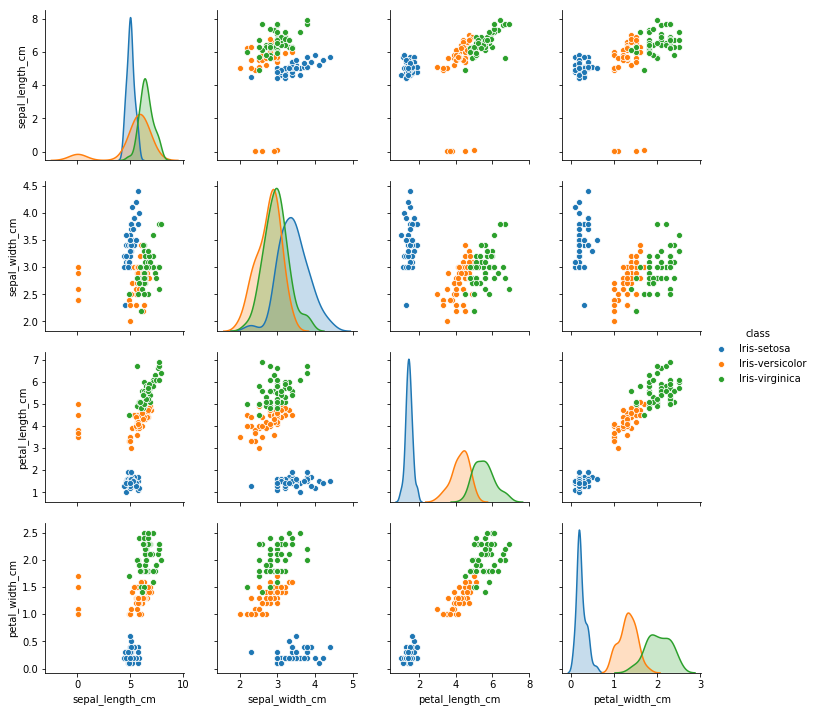

In [11]:
#绘制散点图矩阵
sns.pairplot(iris_data,hue='class')

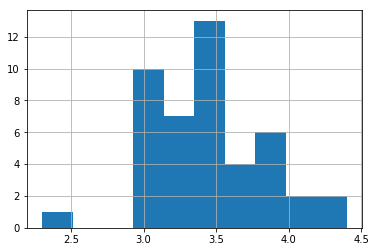

In [12]:
#通过iris_setosa的花萼宽度绘制直方图观测异常
#iris_data.ix[iris_data['class']=='Iris-setosa','sepal_width_cm'].hist()
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

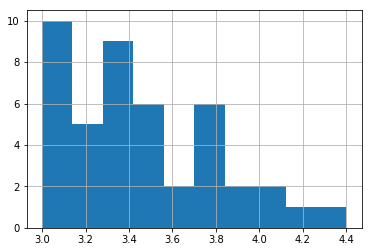

In [13]:
#对异常值产生原因不够清楚，过滤小于2.5cm的数据
iris_data=iris_data.loc[(iris_data['class']!='Iris-setosa')|
                        (iris_data['sepal_width_cm'] >=2.5)]
iris_data.loc[iris_data['class']=='Iris-setosa','sepal_width_cm'].hist()

In [14]:
iris_data.loc[(iris_data['class']=='Iris-versicolor') &
                        (iris_data['sepal_length_cm'] <1.0),'sepal_length_cm']*=100

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
iris_data.to_csv("/home/ysc/数据分析/data/第五讲/iris-data_clean.csv",index=False)

In [17]:
iris_data=pd.read_csv("/home/ysc/数据分析/data/第五讲/iris-data_clean.csv")
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris_data.shape

(144, 5)

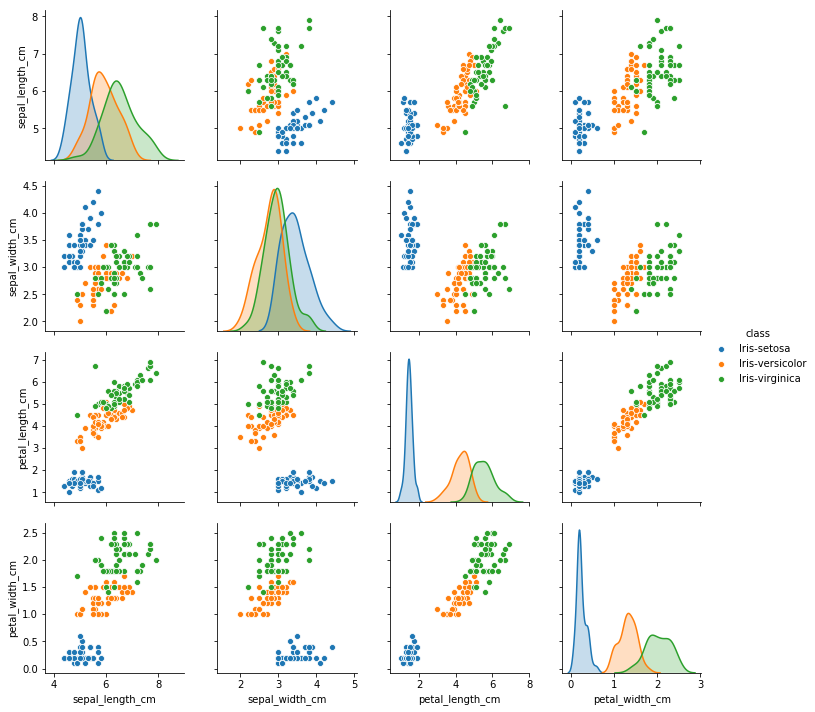

In [19]:
#sns.pairplot(iris_data,hue='class')
sns.pairplot(iris_data,hue='class')

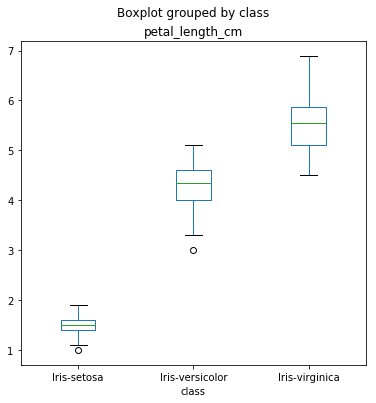

In [20]:
#绘制箱型图发现规律
iris_data.boxplot(column='petal_length_cm',by='class',grid=False,figsize=(6,6))